In [1]:
#First importing the necessary libraries helpful in building and/or testing the model
#Three main libraries for a start: numpy, pandas, matplotlib.pyplot
#numpy is for linear algebra, pandas for data processing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Kintu Christopher
## This is my assignment.
## I am in to win the competition

```import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))```
        
 


In [2]:

# Input data files necessary for this assignment were obtained from "../input/" directory.

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))



In [3]:
#ignoring warnings: It is necessary to import while ignoring warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
# The data sets are loaded and read as below in form of csv files
Train = pd.read_csv("../AMP Data Sets/AMP_TrainSet.csv")
Test = pd.read_csv("../AMP Data Sets/Test.csv")

# Data visualization
## The data is loaded for viewing directly from the ACE_class_Assignment folder. This displays, in tabular format, the real values we are to work with.

In [5]:
#There is need to know how many dimensions our data has
# This helps me to know how many rows or columns are in each data set and also how large the data set is.
#Too many rows and columns require a longer time to train the model.

Train.shape, Test.shape

# The Train data set has 12 columns and 3038 rows. 
# The Test data set has 758 rows and 11 columns
#This means our Train data is large enough to train the algorithm without over training or under training

((3038, 12), (758, 11))

In [6]:
#Checking the column variables for the Train data set
#This gives me an idea of the variables I am dealing with and how they are labelled.

Train.columns

Index(['FULL_Charge', 'FULL_AcidicMolPerc', 'FULL_AURR980107',
       'FULL_DAYM780201', 'FULL_GEOR030101', 'FULL_OOBM850104', 'NT_EFC195',
       'AS_MeanAmphiMoment', 'AS_DAYM780201', 'AS_FUKS010112', 'CT_RACS820104',
       'CLASS'],
      dtype='object')

In [7]:
#Similarly, checking for column variables for the Test data set

Test.columns

Index(['FULL_Charge', 'FULL_AcidicMolPerc', 'FULL_AURR980107',
       'FULL_DAYM780201', 'FULL_GEOR030101', 'FULL_OOBM850104', 'NT_EFC195',
       'AS_MeanAmphiMoment', 'AS_DAYM780201', 'AS_FUKS010112',
       'CT_RACS820104'],
      dtype='object')

In [8]:
# It is good to also take a look at they data types for each data set. 
#Just incase there are strings that need to be converted into floats 

#First, the train data set
Train.dtypes

#The data type of the train set is an object
#The column variables are all floats and integers as shown below

FULL_Charge           float64
FULL_AcidicMolPerc    float64
FULL_AURR980107       float64
FULL_DAYM780201       float64
FULL_GEOR030101       float64
FULL_OOBM850104       float64
NT_EFC195               int64
AS_MeanAmphiMoment    float64
AS_DAYM780201         float64
AS_FUKS010112         float64
CT_RACS820104         float64
CLASS                   int64
dtype: object

In [9]:
#Similarly, for the Test data set

Test.dtypes

#It is an object, with floats and integers only. 
#This is good, we dont need to change anything.
#We are good to go.

FULL_Charge           float64
FULL_AcidicMolPerc    float64
FULL_AURR980107       float64
FULL_DAYM780201       float64
FULL_GEOR030101       float64
FULL_OOBM850104       float64
NT_EFC195               int64
AS_MeanAmphiMoment    float64
AS_DAYM780201         float64
AS_FUKS010112         float64
CT_RACS820104         float64
dtype: object

# Checking for quick statistical comparisons
## This will quickly give me a view of the relationship between variables.

In [10]:
#We check out quick summary statistics for both data sets

Train.describe()

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
count,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000
mean,2.060237,8.521520,0.971410,73.668760,0.994007,-2.432927,0.088545,15.683233,73.650828,5.911361,1.235255,0.500000
std,3.819929,7.586652,0.107413,8.527489,0.031333,1.707223,0.284133,11.575665,9.166092,0.693689,0.210012,0.500082
min,-16.000000,0.000000,0.684000,42.750000,0.866000,-10.432000,0.000000,0.041000,42.778000,3.533000,0.785000,0.000000
25%,0.000000,2.516000,0.895000,68.294000,0.974000,-3.606000,0.000000,5.587500,67.556000,5.459250,1.082000,0.000000
50%,2.000000,7.143000,0.963000,74.059500,0.994000,-2.296500,0.000000,14.988500,73.697000,5.925500,1.184000,0.500000
75%,4.000000,13.158000,1.041000,79.343750,1.011000,-1.283250,0.000000,26.807750,79.778000,6.382000,1.351000,1.000000
max,30.000000,46.667000,1.451000,101.682000,1.196000,3.576000,1.000000,51.280000,103.167000,8.662000,2.192000,1.000000


In [11]:
#summary statistics for the Test data set too

Test.describe()

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,2.073879,8.945091,0.973046,73.821891,0.994212,-2.397922,0.084433,15.570067,73.844204,5.904492,1.250189
std,4.230615,7.814449,0.110676,8.029524,0.032370,1.597138,0.278219,11.362589,8.915193,0.656911,0.218102
min,-13.000000,0.000000,0.699000,47.000000,0.889000,-7.844000,0.000000,0.060000,47.000000,3.843000,0.841000
25%,-0.500000,2.721750,0.894000,68.740250,0.973000,-3.457250,0.000000,5.709000,68.346000,5.471250,1.096000
50%,2.000000,7.500000,0.965000,74.069500,0.994000,-2.238000,0.000000,15.057000,73.646000,5.935500,1.188000
75%,4.000000,14.230250,1.053500,79.284750,1.013000,-1.306250,0.000000,25.290250,80.069250,6.375250,1.378500
max,30.000000,44.118000,1.431000,102.929000,1.182000,2.017000,1.000000,50.098000,102.929000,7.588000,2.283000


# Attribute Correlations
## It is important to check whether different attributes have a positive or negative correlation or none.

In [12]:
#Assuming a Gaussian distribution for both data stes; we shall use the pearson correlation

Train.corr(method = 'pearson')


,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
FULL_Charge,1.000000,-0.612996,-0.490977,-0.434603,-0.058725,-0.283758,0.088068,0.355477,-0.365374,-0.090570,0.232929,0.534602
FULL_AcidicMolPerc,-0.612996,1.000000,0.794796,0.541481,0.115201,0.513344,-0.143168,-0.431590,0.449621,0.002334,-0.213543,-0.598816
FULL_AURR980107,-0.490977,0.794796,1.000000,0.548253,0.346139,0.462712,-0.169540,-0.426097,0.456260,0.032958,-0.403599,-0.584111
FULL_DAYM780201,-0.434603,0.541481,0.548253,1.000000,0.010118,0.334778,-0.090058,-0.408793,0.894191,0.055915,-0.326792,-0.554838
FULL_GEOR030101,-0.058725,0.115201,0.346139,0.010118,1.000000,0.319157,-0.230417,-0.160269,-0.029085,0.040480,-0.151935,-0.260470
FULL_OOBM850104,-0.283758,0.513344,0.462712,0.334778,0.319157,1.000000,-0.230561,-0.336297,0.275640,-0.452769,0.155304,-0.453287
NT_EFC195,0.088068,-0.143168,-0.169540,-0.090058,-0.230417,-0.230561,1.000000,0.178683,-0.036844,0.145924,0.080898,0.260702
AS_MeanAmphiMoment,0.355477,-0.431590,-0.426097,-0.408793,-0.160269,-0.336297,0.178683,1.000000,-0.322378,0.025580,0.171524,0.693552
AS_DAYM780201,-0.365374,0.449621,0.456260,0.894191,-0.029085,0.275640,-0.036844,-0.322378,1.000000,0.045562,-0.256060,-0.437168
AS_FUKS010112,-0.090570,0.002334,0.032958,0.055915,0.040480,-0.452769,0.145924,0.025580,0.045562,1.000000,-0.445284,0.033432


In [13]:
#Correlation on the Test data set

Test.corr(method = 'pearson')

#A quci eyeball shows all variables have some form of correlation to each other. 
#There is no variable with zero correlation to another

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104
FULL_Charge,1.000000,-0.636153,-0.512634,-0.423297,-0.041073,-0.267569,0.048003,0.315226,-0.333469,-0.117356,0.239915
FULL_AcidicMolPerc,-0.636153,1.000000,0.813635,0.514432,0.150881,0.474707,-0.084944,-0.357758,0.402034,0.141849,-0.294068
FULL_AURR980107,-0.512634,0.813635,1.000000,0.519587,0.420289,0.453385,-0.124539,-0.359845,0.409438,0.142190,-0.436791
FULL_DAYM780201,-0.423297,0.514432,0.519587,1.000000,0.082603,0.295562,-0.095313,-0.331024,0.847809,0.136920,-0.341753
FULL_GEOR030101,-0.041073,0.150881,0.420289,0.082603,1.000000,0.348001,-0.186815,-0.161173,0.006709,0.053917,-0.231629
FULL_OOBM850104,-0.267569,0.474707,0.453385,0.295562,0.348001,1.000000,-0.193132,-0.268725,0.235712,-0.383245,0.080936
NT_EFC195,0.048003,-0.084944,-0.124539,-0.095313,-0.186815,-0.193132,1.000000,0.099988,-0.074133,0.164965,0.071861
AS_MeanAmphiMoment,0.315226,-0.357758,-0.359845,-0.331024,-0.161173,-0.268725,0.099988,1.000000,-0.221153,0.007911,0.144333
AS_DAYM780201,-0.333469,0.402034,0.409438,0.847809,0.006709,0.235712,-0.074133,-0.221153,1.000000,0.108141,-0.250624
AS_FUKS010112,-0.117356,0.141849,0.142190,0.136920,0.053917,-0.383245,0.164965,0.007911,0.108141,1.000000,-0.402763


# Plotting the data
## Upon noticing some correlation, it is good to cisualize it in a heatmap

In [14]:
# Visualizing correlations between attributes using heatmaps
#import the necessary library; seaborn

import seaborn as sns


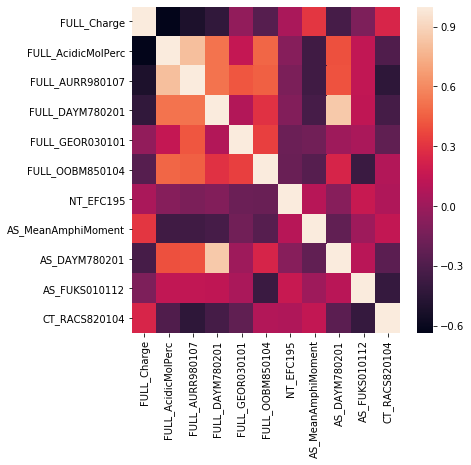

In [15]:
#plot a heat map for the Test data set
plt.figure(figsize=(6,6))
sns.heatmap(Test.corr(method='pearson'))

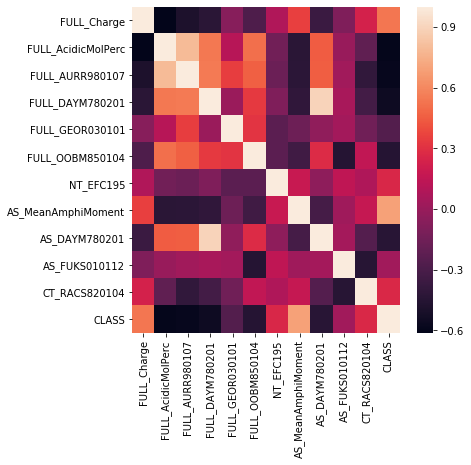

In [16]:
#Heat map for the Train data set
plt.figure(figsize=(6,6))
sns.heatmap(Train.corr(method='pearson'))

## Testing for skewness of variables
# This will be important incase some variables are skewed either positively or negatively since we are assuming a Gaussian distribution. Correcting for this skewness improves on the accuracy of the model.

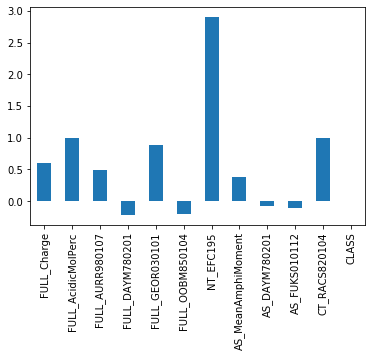

In [17]:
#Skewness of distributions on the Train data set
Train.skew().plot(kind= 'bar')

#The NT_EFC195 show a high right skew (above 1).
#We shall have to correct for this to improve the model accuracy
#This we shall do by finding the square root, cube root or a logarithmic transformation

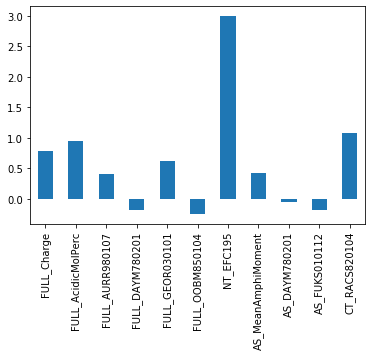

In [18]:
#Testing for skewness on the Train Data set

Test.skew().plot(kind= 'bar')

# This data set also has a high positive skew for the NT_EFC195 variable as well

## Understanding my data
# Different plots will give me a good insight into what to do next with the data I have.Plots like histograms, scatter plots are good to give a genearl view

<Figure size 1080x1080 with 0 Axes>

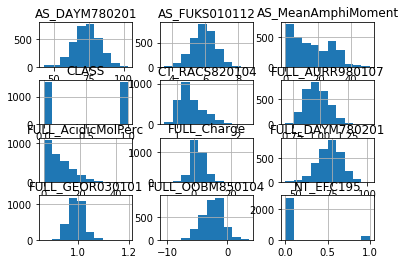

In [19]:
#Plotting a histogram for the Train Data

plt.figure(figsize=(15,15))
Train.hist()
plt.show()


<Figure size 1080x1080 with 0 Axes>

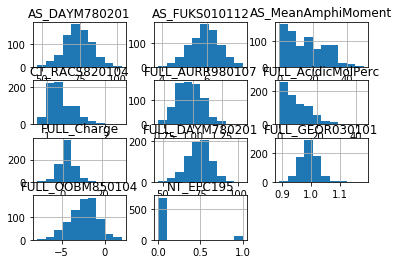

In [20]:
#Plotting a histogram for the Test Data

plt.figure(figsize=(15,15))
Test.hist()
plt.show()

In [21]:
#Rug plots
#The rugplots are like histograms except they show every single data point on the x-axis, allowing us to visualize all of the actual values
#Both the Train and Test rugplots indicate some kind of left skew. This we need to take into account when designing the model

ValueError: too many values to unpack (expected 2)

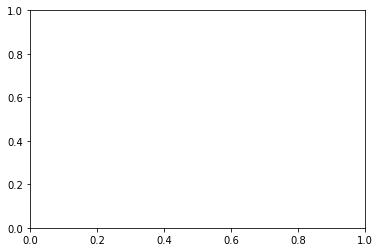

In [22]:
sns.distplot(Train, hist = False, kde = True, rug = True, color = 'darkblue', kde_kws={'linewidth': 3}, rug_kws={'color': 'black'})

ValueError: too many values to unpack (expected 2)

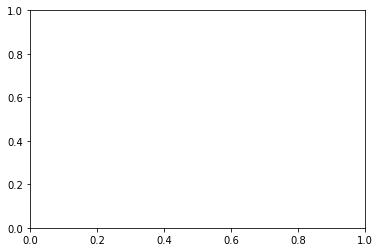

In [ ]:
sns.distplot(Test, hist = False, kde = True, rug = True, color = 'darkblue', kde_kws={'linewidth': 3}, rug_kws={'color': 'black'})

In [ ]:
#Box plots

In [ ]:
#Train
Train.plot(kind='box', subplots=True, layout=(12,12), sharex=False, sharey=False)
plt.show()

In [ ]:
#Test
Test.plot(kind='box', subplots=True, layout=(12,12), sharex=False, sharey=False)
plt.show()

In [ ]:
#Scatter Plot matrix
#scatter plot matrix shows the relationship between two variables as dots in two dimensions all at once

In [ ]:
#sns.pairplot(Train)
#The scatter plot for the train dataset indicates a mixture of correlations for different variables. 
#Some have a positive strong correlation, others a negative correlation

In [ ]:
#Test data scatter plot
#sns.pairplot(Test)
#Similarly, some have aa positive correlation and negative correlation between different paired variables

# Preparing Data for machine learning

# Rescaling Data

In [ ]:
#Rescaling
#Since I might use features like regression and neural networks and algorithms that use distance measures like k-Nearest Neighbors. 
#I need to rescale my data using scikit-learn using the MinMaxScaler class

In [ ]:
#We rescale to make sure all our data values lie in a scale from 0 to 1
#from numpy import set_printoptions
#from sklearn.preprocessing import MinMaxScaler

#array = Train.values
# separate array into input and output components
#X = array[:,0:11]
#Y = array[:,11]
#scaler = MinMaxScaler(feature_range=(0, 1))
#rescaledX = scaler.fit_transform(X)
# summarize transformed data
#set_printoptions(precision=3)
#print(rescaledX[0:5,:])

#Indeed all our data values have been rescaled

# standardization of data
```from sklearn.preprocessing import StandardScaler

array2 = data.values
#separate array into input and output components
X = array2[:,0:8]
Y = array2[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])
```

# Normalization of data
``from sklearn.preprocessing import Normalizer

array3 = data.values
#separate array into input and output components
X = array3[:,0:8]
Y = array3[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
#summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])
print(type(normalizedX))#print the data type so we can know what we are 
#working with in the dataset.
```

```# Binarizing data
from sklearn.preprocessing import Binarizer

array4 = data.values
#separate array into input and output components
X = array4[:,0:11]
Y = array4[:,11]
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
#summarize transformed data
set_printoptions(precision=3)
print(binaryX[0:5,:])
```



# using Standardized generation

In [ ]:
#standardizing data
#from sklearn.preprocessing import StandardScaler

#array2 = Train.values
# separating array into input and output components
#X = array2[:,0:11]
#Y = array2[:,11]
#scaler = StandardScaler().fit(X)
#rescaledX = scaler.transform(X)

# summarizing transformed data
#set_printoptions(precision=3)
#print(rescaledX[0:5,:])

# Binarizing data
## This will help incase there are probabilities in the data that need to be turned into crisp values.

In [ ]:
# binarization
# It will turn data into 0s and 1s
from numpy import set_printoptions
from sklearn.preprocessing import Binarizer

array4 = Train.values
# separate array into input and output components
X = array4[:,0:11]
Y = array4[:,11]
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(binaryX[0:7,:]) #I am selecting the 7 best attributes out of the 11 to cover atleast 50% of the selected attributes


# Feature Selection

In [ ]:
#Using the Recursive elimination
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression

#array_1 = Train.values
#X = array_1[:,0:11]
#Y = array_1[:,11]

# Extracting features
#model = LogisticRegression()
#rfe = RFE(model, 3)
#fit = rfe.fit(X, Y)
#print("Num Features: ",  fit.n_features_)
#print("Selected Features:",  fit.support_)
#print("Feature Ranking: ",  fit.ranking_)

In [ ]:
#evaluating perfomance
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression

#array = Train.values
#X = array[:,0:11]
#Y = array[:,11]
#test_size = 0.33
#seed = 10
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
#model = LogisticRegression()
#model.fit(X_train, Y_train)
#result = model.score(X_test, Y_test)
#print("Accuracy: ",  (result*100.0))

In [ ]:
#model output

In [ ]:
#out = model.predict(Test.values)

#KC = pd.DataFrame(out) #Converting to data frame
#KC.columns=["CLASS"] #Naming the column
#KC.index.name="Index" #Creating a column index
#KC["CLASS"]=KC["CLASS"].map({0.0:False,1.0:True}) # Chaninging 0 to "False" 1 to "True"

#KC.to_csv("KC_csv") ## Writing a csv file
#print(KC['CLASS'].unique())
#print(KC['CLASS'].nunique())

#printing the numbers of False and True
#print(KC.groupby('CLASS').size()[0].sum()) #
#print(KC.groupby('CLASS').size()[1].sum())

In [ ]:
#from sklearn.preprocessing import StandardScaler

#array2 = Train.values
# separating array into input and output components
#X = array2[:,0:11]
#Y = array2[:,11]
#scaler = StandardScaler().fit(X)
#rescaledX = scaler.transform(X)
# transformed data should be summarized using the code below
#set_printoptions(precision=3)
#print(rescaledX[0:5,:])

# Principal Component analysis feature

In [ ]:
#Training the model using PCA as the feature of choice
#from sklearn.decomposition import PCA

#array = Train.values
#X = array[:,0:11]
#Y = array[:,11]

# feature extraction
#pca = PCA(n_components=3)
#fit = pca.fit(X)
# summarize components
#print("Explained Variance: " , fit.explained_variance_ratio_)
#print(fit.components_)

# Output model using PCA as the feature

In [ ]:
#out = model.predict(Test.values)

#KC2 = pd.DataFrame(out) #Converting the data to data frame
#KC2.columns=["CLASS"] #Naming the column
#KC2.index.name="Index" #Creating a column index
#KC2["CLASS"]=KC2["CLASS"].map({0.0:False,1.0:True}) # Chaninging 0 to "False" 1 to "True"

#KC2.to_csv("KC2_csv") # obtaininng a csv file
#print(KC2['CLASS'].unique())
#print(KC2['CLASS'].nunique())

#printing the numbers of False and True
#print(KC2.groupby('CLASS').size()[0].sum()) #
#print(KC2.groupby('CLASS').size()[1].sum())

In [ ]:
#print("Hello")

# sklearn.feature_selection.SelectFromModel
## Parameters for the model

### estimator: object
```The base estimator from which the transformer is built. This can be both a fitted (if prefit is set to True) or a non-fitted estimator. The estimator must have either a feature_importances_ or coef_ attribute after fitting.
Features whose importance is greater or equal are kept while the others are discarded. If “median” (resp. “mean”), then the threshold value is the median (resp. the mean) of the feature importances. A scaling factor (e.g., “1.25*mean”) may also be used. If None and if the estimator has a parameter penalty set to l1, either explicitly or implicitly (e.g, Lasso), the threshold used is 1e-5. Otherwise, “mean” is used by default.
Whether a prefit model is expected to be passed into the constructor directly or not. If True, transform must be called directly and SelectFromModel cannot be used with cross_val_score, GridSearchCV and similar utilities that clone the estimator. Otherwise train the model using fit and then transform to do feature selection.```

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

array6 = Train.values
X = array6[:,0:11]
Y = array6[:,11]

#fitting to the model
selector = SelectFromModel(estimator=LogisticRegression()).fit(X, Y)
selector.estimator_.coef_
array6
selector.threshold_

selector.get_support()
array6
selector.transform(X)


# Logistic model output

In [ ]:
#model2 = model.predict(Test.values)

#KC3 = pd.DataFrame(model2) #Converting the data to data frame
#KC3.columns=["CLASS"] #Naming the column
#KC3.index.name="Index" #Creating a column index
#KC3["CLASS"]=KC3["CLASS"].map({0.0:False,1.0:True}) # Chaninging 0 to "False" 1 to "True"

#KC3.to_csv("KC3_csv") # obtaininng a csv file
#print(KC3['CLASS'].unique())
#print(KC3['CLASS'].nunique())

#printing the numbers of False and True
#print(KC3.groupby('CLASS').size()[0].sum()) 
#print(KC3.groupby('CLASS').size()[1].sum())

# Recursive feature model elimination

In [ ]:
#import numpy as np
#from sklearn.feature_selection import RFE
#from sklearn.svm import SVR
#array8 = Train.values
#array8 = Train.values
#X = array8[:,0:11]
#Y = array8[:,11]
#estimator = SVR(kernel="linear")
#selector = RFE(estimator, 5, step=1)
#selector = selector.fit(X, Y)
#set_printoptions(precision=3)
#print(estimator[0:7,:]) #To print out the chosen 7 attributes that best fit the data

In [ ]:
#from sklearn.linear_model import ElasticNet
#from sklearn.datasets import make_regression
#X, Y = Train(n_features=2, random_state=0)
#regr = ElasticNet(random_state=0)
#regr.fit(X, Y)
#ElasticNet(random_state=0)
#print(regr.coef_)
#print(regr.intercept_)
#print(regr.predict([[0, 0]]))

#model2 = model.predict(Test.values)

#KC3 = pd.DataFrame(model2) #Converting the data to data frame
#KC3.columns=["CLASS"] #Naming the column
#KC3.index.name="Index" #Creating a column index
#KC3["CLASS"]=KC3["CLASS"].map({0.0:False,1.0:True}) # Chaninging 0 to "False" 1 to "True"

#KC3.to_csv("KC3_csv") # obtaininng a csv file
#print(KC3['CLASS'].unique())
#print(KC3['CLASS'].nunique())

#printing the numbers of False and True
#print(KC3.groupby('CLASS').size()[0].sum()) 
#print(KC3.groupby('CLASS').size()[1].sum())


In [ ]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])
Lasso(alpha=0.1)
reg.predict([[1, 1]])
array([0.8])

# Comparison of different models
## To select which model works best
```A comparison of all models will enable me select out which models best suit the data.
From these, I can pick out which one gives best accuracy and perfom an MCM statistics.```


# Linear regression
```Linear regression fits a linear model with coefficients to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Linear regression will enable me fit the best line on the distributions in the data. There are more advanced ways to fit a line to data, but in general, I want the line to go through the "middle" of the points.```

# Histogram-based Gradient Boosting Classification Tree
```Although Gradient boosting is a greedy algorithm and can overfit a training dataset quickly, It can benefit from regularization methods that penalize various parts of the algorithm and generally improve the performance of the algorithm by reducing overfitting. I want to use this model to checkfo overfitting .```

# K-fold
```When we split the dataset into training and test set, we use only a subset of data and we know when we train on fewer observations the model will not perform well and overestimate the test error rate for the model to fit on the entire dataset. We correct for this by using a K-fold cross-validation with a specified number of kfolds. Cross-validation will give me a more accurate estimate of a model’s performance```

# XGBClassifier
```XGBoost is an efficient and easy to use an algorithm which delivers high performance and accuracy as compared to other algorithms. I added XGBClassifier because it has in-built L1 (Lasso Regression) and L2 (Ridge Regression) regularization which prevents the model from overfitting.```

# RandomForestClassifier 
``` I added Random forest classifier because it is one of the most accurate learning algorithms available. For many data sets, it produces a highly accurate classifier. It runs efficiently on large databases. It can handle thousands of input variables without variable deletion. It will be a good basis to compare other models```

# SGDClassifier
``` Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. I chose to add it as one of the models has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. This classifier supports multi-class classification by combining multiple binary classifiers in a “one versus all” (OVA) scheme.```

# DecisionTreeClassifier
```Thi algorithm is simpler to understand, interpret and visualize. Effort required for Data preparation is minimal. Additionally, decision trees combined into an ensemble create some of the best binary classifiers.```

# BaggingClassifier 
```Bagging takes the advantage of ensemble learning wherein multiple weak learner outperform a single strong learner. It helps reduce variance and thus helps us avoid overfitting. There is loss of interpretability of the model. There can possibly be a problem of high bias if not modeled properly.```

# Coss validation score
```Using cross validation can give me a hint of how well my model is doing, and it has the advantage of being very robust (as opposed to simple train-test split). It can be also used in hyper-tuning of parameters: for a given parameters, using the CV score to optimize its value in a robust way.```

# LogisticRegression 
```I chose Logistic Regression because performs well when the dataset is linearly separable.Logistic regression is less prone to over-fitting but it can overfit in high dimensional datasets. Logistic Regression not only gives a measure of how relevant a predictor (coefficient size) is, but also its direction of association (positive or negative). Logistic regression is easier to implement, interpret and very efficient to train. It would work well in prediciting my model.```

# KNeighborsClassifier
```I chose this algorithm because it is simple and easy to implement. There's no need to build a model, tune several parameters, or make additional assumptions. The algorithm is versatile. It can be used for classification, regression, and search.```

# LinearDiscriminantAnalysis
```LDA in the binary-class case has been shown to be equivalent to linear regression with the class label as the output. This implies that LDA for binary-class classiﬁcations can be formulated as a least squares problem. It will give me a good comparison with the linear regression model already included.```

# GaussianNB 
```I chose the naive Bayesian classifier because they are extremely fast for both training and prediction. They provide straightforward probabilistic prediction. This classifier needs less training data, highly scalable. It scales linearly with the number of predictors and data points. Can be used for both binary and mult-iclass classification problems. Can make probabilistic predictions. Handles continuous and discrete data. Not sensitive to irrelevant features. It would therefore be a good model to include in the testing algorithms```

# SVC
``I added this model beause SVM Classifiers offer good accuracy and perform faster prediction compared to Naïve Bayes algorithm.They willhelp me audit the naive bayes classifier. They also use less memory because they use a subset of training points in the decision phase. SVM works well with a clear margin of separation and with high dimensional space. Evenwhen my dimentional space is not that big, its worth a try.```

# HistGradientBoostingClassifier
```This is one of the ensemble methods. The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator. It will give me a good comparison with the model.```








In [ ]:
# Models comparison
from sklearn import linear_model
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
# Combining all models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('RFC',RandomForestClassifier()))
models.append(('BAG',BaggingClassifier()))
models.append(('XGB',XGBClassifier()))
models.append(('SGD',SGDClassifier()))
models.append(('HGB',HistGradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# EStimating accuracy of the models
## Model accuracy
```The accuracy of the models is determined to inform the next step over which is the most 
accurate model to follow.```

In [ ]:
# The comparative accuracies of the models is determined

results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    kc4 = (name, cv_results.mean(), cv_results.std())
    print(kc4)

# Model chosen
## NB', GaussianNB() 
```GaussianNB shows the highest accuracy, at 88%.
I chose to test this further. Furtherstill, I choose this particular model because of the boxplot comparison
It has a small error from the mean. Thus its accuracy can be trusted to a better extent compared to other models```

# Graph to show comparisons

In [ ]:
fig = plt.figure()
fig.suptitle('Comparison of models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Testing the model on Matthew's Correlation Coefficient
``` To futher test for a better metric than accuracy, I will test the GaussianNB modle on Matthew's correlation```

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

array= Train.values
X = array[:,0:11]
Y = array[:,11]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

kintu_model2 = LogisticRegression()
kintu_model2.fit(X_train, Y_train)

predicted3= kintu_model2.predict(X_test)
comp_mat = matthews_corrcoef(Y_test, predicted3)
print(comp_mat)

#Mathews correlation coefficient gives a moderate

# Generating the csv file
``` I generate a csv file to enable me judge the accuracy of this model and submit to the competition.```

In [ ]:
#Generating a csv file
kintu_df=pd.DataFrame(predicted3)
kintu_df.columns=['CLASS']
kintu_df.index.names=["Index"]
kintu_df['CLASS']=kintu_df['CLASS'].map({0.0:False, 1.0:True})
kintu_df
kintu_df.to_csv('KC_model2_csv')
print(kintu_df['CLASS'].unique())

# Re-testingLinear Regression
```Running each model seperately to allow me change certain parameters 
that are not possible tochange when doing an overall comparison```

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
array2 = Train.values
reg = LinearRegression().fit(X, Y)
reg.score(X, Y)
scoring = ('Accuracy')
reg.coef_
reg.intercept_
xp = reg.predict(X)
xp
